## Caso 1



In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [54]:
#Importar base de datos
df = pd.read_csv('nike_shoes_sales.csv')

In [55]:
df.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [56]:
df.info

<bound method DataFrame.info of                              product_name  product_id  listing_price  \
0          Nike Air Force 1 '07 Essential  CJ1646-600              0   
1                    Nike Air Force 1 '07  CT4328-101              0   
2            Nike Air Force 1 Sage Low LX  CI3482-200              0   
3                     Nike Air Max Dia SE  CD0479-200              0   
4                     Nike Air Max Verona  CZ6156-101              0   
..                                    ...         ...            ...   
638                    Air Jordan 8 Retro  CI1236-100          15995   
639            Nike Phantom Venom Club IC  AO0578-717           4995   
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   
641                       Nike Air Max 98  AH6799-300              0   
642                        Nike P-6000 SE  CJ9585-600           8995   

     sale_price  discount brand  \
0          7495         0  Nike   
1          7495         0  Nike  

In [57]:
df.describe()

,listing_price,sale_price,discount,rating,reviews
count,643.000000,643.000000,643.0,643.000000,643.000000
mean,3875.762053,10213.676516,0.0,2.734837,7.181960
std,5889.947172,4513.289512,0.0,2.137756,15.968315
min,0.000000,1595.000000,0.0,0.000000,0.000000
25%,0.000000,6995.000000,0.0,0.000000,0.000000
50%,0.000000,9597.000000,0.0,3.800000,1.000000
75%,8495.000000,12797.000000,0.0,4.600000,6.000000
max,19995.000000,36500.000000,0.0,5.000000,223.000000


Hasta el momento se puede observar que no hay descuentos para ninguna referencia, el rating se califica de 0 a 5, el máximo precio de un par de tenis es de $36.500 USD y su mínimo es de $1.595 USD, el precio promedio es de $10.213 USD, con esto se podría decir que los tenis nike son para un cliente con un poder adquisitivo muy alto, y probablemente la mayoría de los tenis de la base de datos son ediciones limitadas o colecciones sofisticadas. Se observa también que no hay reviews de las personas en la gran mayoría de las referencias. 

**Si el "listing_price" se interpreta como el costo de colocar una referencia de tenis a la venta y el "sale_price" como el precio de venta al cliente, las utilidades sin tener en cuenta costos y gastos de la operación, son bastante altas.**

Se trabajará con sale_price como variable dependiente (Y), encontraremos los predictores más adelante con los análisis de significancia y coeficiente de determinación.

In [58]:
total_faltantes_por_columna = df.isnull().sum()
total_faltantes_por_columna

product_name      0
product_id        0
listing_price     0
sale_price        0
discount          0
brand             0
description       3
rating            0
reviews           0
images           71
dtype: int64

Se limpiará la base de datos, es decir, se borrarán las columnas que en este caso no serviran para el análisis como lo son "discount" e "images".

In [59]:
df.drop(['discount', 'images'], axis=1, inplace=True)

Además se llenarán los faltantes

In [60]:
df['description'].fillna('', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3728\2526826900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


In [61]:
df.head()

,product_name,product_id,listing_price,sale_price,brand,description,rating,reviews
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0
1,Nike Air Force 1 '07,CT4328-101,0,7495,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,Nike,"Taking both height and craft to new levels, th...",0.0,0
3,Nike Air Max Dia SE,CD0479-200,0,9995,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0
4,Nike Air Max Verona,CZ6156-101,0,9995,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0


Se realizarán gráficos para observar la distribución y el comportamiento de los datos.

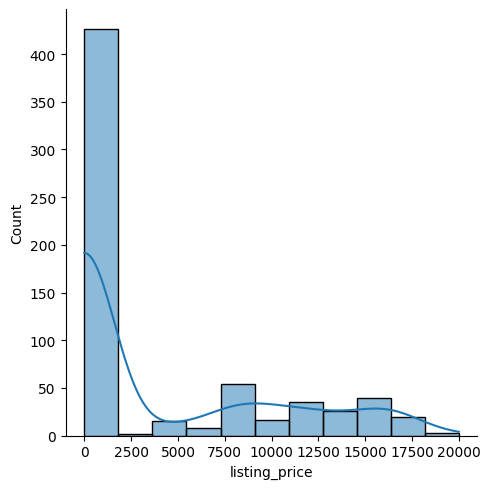

In [62]:
sns.displot(data=df, x="listing_price", kde=True)

Como se puede observar la mayoria de los datos tienen un costo de venta de 0, es decir para la empresa es muy rentable vender cada par de tenis, los máximos costos son de $20.000 USD, sin embargo, estos son sustentados con el precio de venta al cliente final.

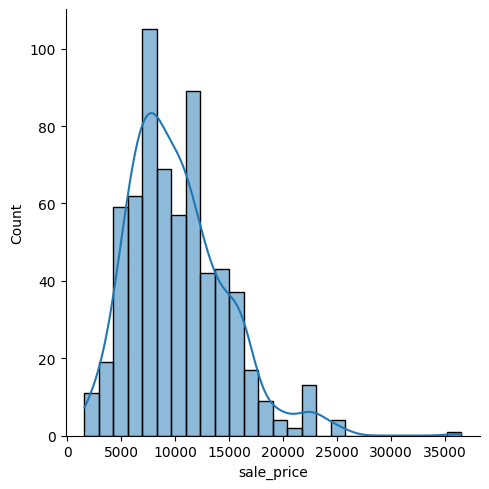

In [63]:
sns.displot(data=df, x="sale_price", kde=True)

La distribución de la variable "sale_price" se parece más a una distribución normal.

También se eliminará los ratings de 0 para la gráfica, ya que significan que no hubo calificación.

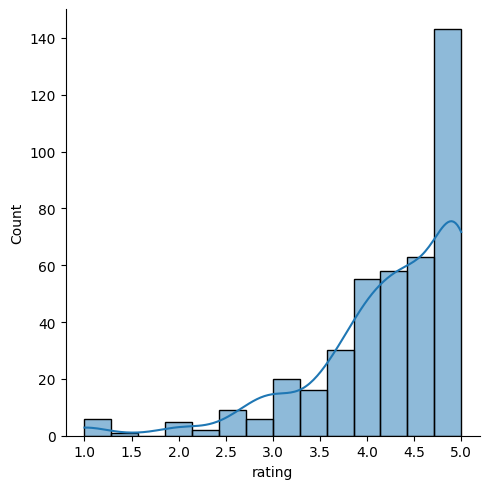

In [64]:
sns.displot(data=df[df["rating"] != 0], x="rating", kde=True)

Se observa que las calificaciones son altas, hay muy pocas bajas, y la gran mayoría tienen una calificación de 5.

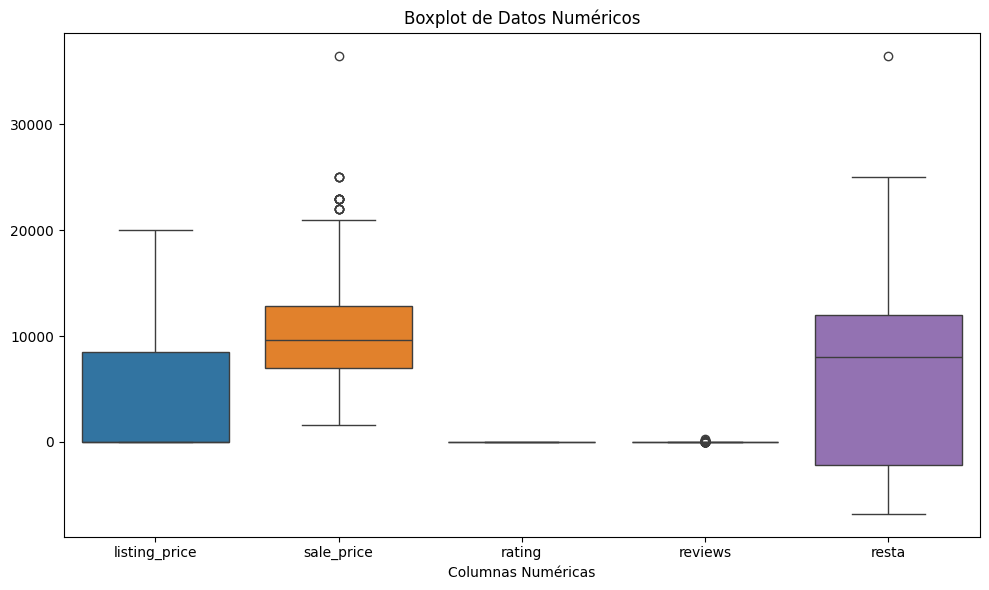

In [73]:

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include='number')

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric)

# Personalizar la gráfica
plt.title('Boxplot de Datos Numéricos')
plt.xlabel('Columnas Numéricas')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Se puede observar como los sale_price son mayores que los listing_price, sale_price tiene algunos datos atípicos, que se podrían analizar como referencias limitadas o exclusivas. Y en la variable resta, se observa como la mayoría son ganancias, sin embargo si hay un porcentaje de perdidas. 

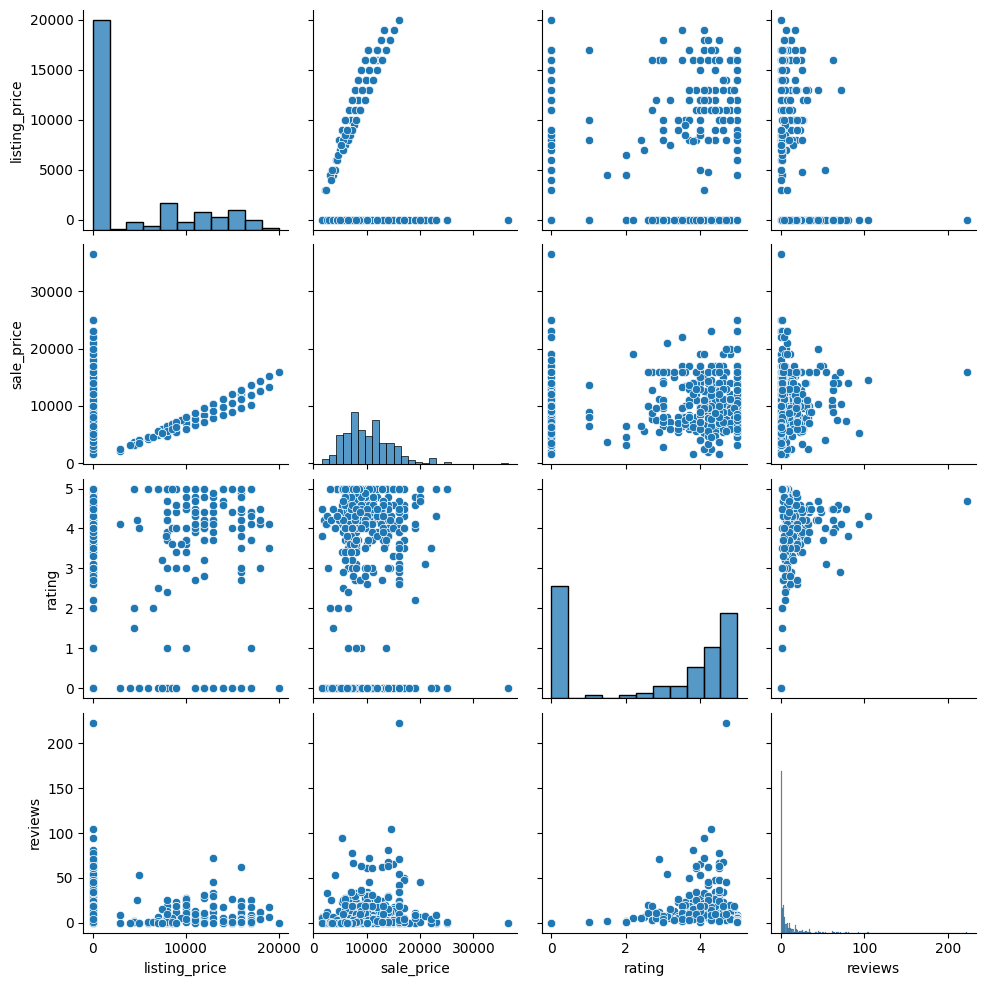

In [66]:
sns.pairplot(df)

Para realizar un mejor análisis de las ganancias de los tenis, haremos una nueva columna de ganancias, teniendo en cuenta que listing_price es el costo de salir al mercado y sale_price es el precio al cliente como ya lo mencionamos. 

In [67]:
df['resta'] = df['sale_price'] - df['listing_price']

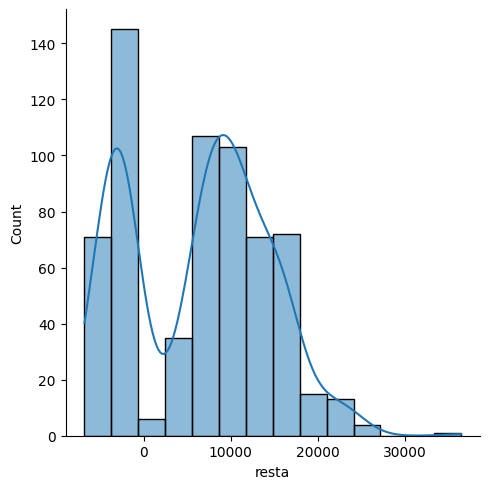

In [68]:
sns.displot(data=df, x="resta", kde=True)

Se observa que hay pérdidas, promociones o salidas del mercado de algunas referencias, pero no es un monto demasiado grande, aunque se observa que ha sido para varias unidades. También que hay ganancias pero no son tan altas como las inversiones que se realizaron. 

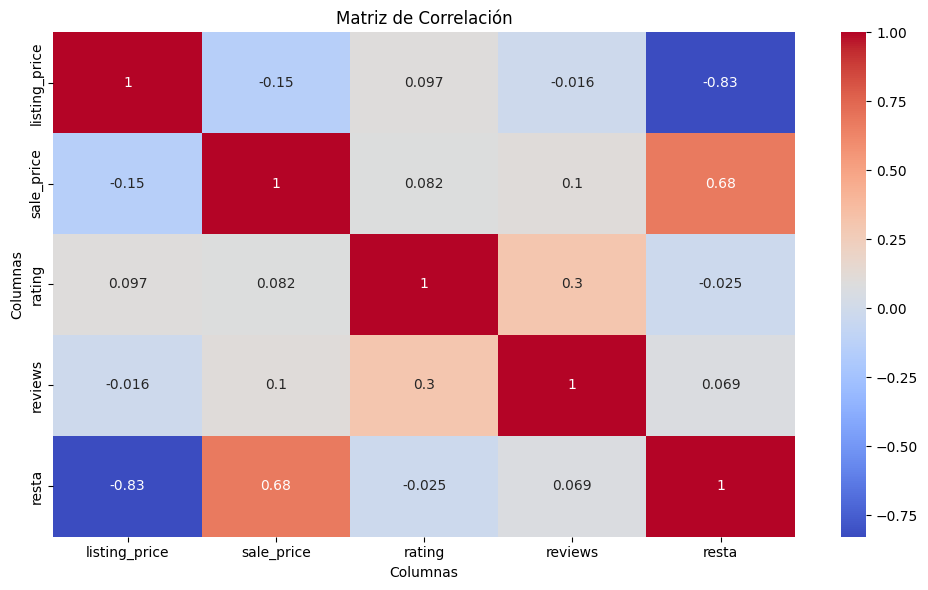

In [69]:
df_numeric = df.drop(columns=['product_name','product_id','brand','description'])

# Calcular la matriz de correlación entre las columnas numéricas del DataFrame
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personalizar la gráfica
plt.title('Matriz de Correlación')
plt.xlabel('Columnas')
plt.ylabel('Columnas')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

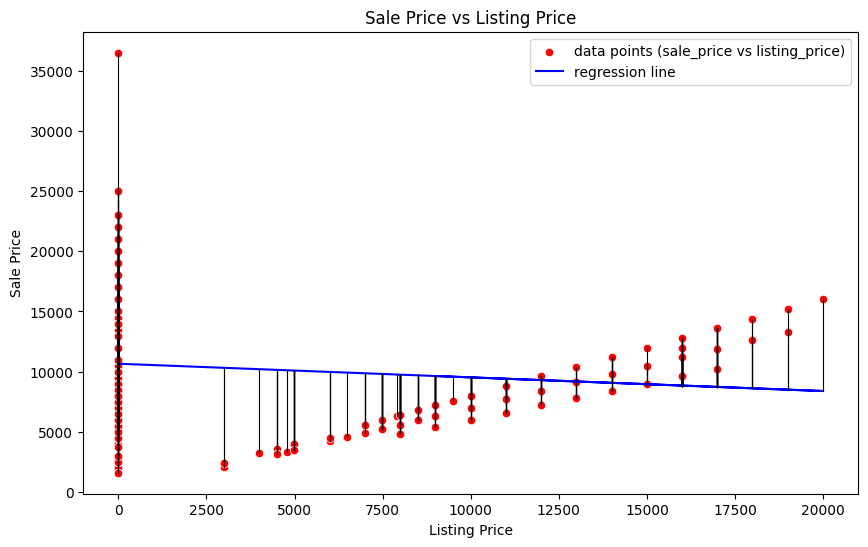

In [71]:
# Crear el gráfico de dispersión con puntos de datos en rojo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='listing_price', y='sale_price', data=df, color='red', label='data points (sale_price vs listing_price)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df['listing_price'], df['sale_price'], 1)
plt.plot(df['listing_price'], slope * df['listing_price'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df.iterrows():
    x = row['listing_price']
    y_actual = row['sale_price']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('Listing Price')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Listing Price')
plt.legend()

# Mostrar el gráfico
plt.show()

In [72]:
df_new = pd.DataFrame(df)

# Añadir una columna de unos para el término de intercepción
df_new['intercept'] = 1

# Definir las variables independiente (X) y dependiente (y)
X = df_new[['intercept', 'listing_price']]
y = df_new['sale_price']
print(X.head())
# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

   intercept  listing_price
0          1              0
1          1              0
2          1              0
3          1              0
4          1              0
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     14.37
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           0.000165
Time:                        21:13:37   Log-Likelihood:                -6315.5
No. Observations:                 643   AIC:                         1.263e+04
Df Residuals:                     641   BIC:                         1.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err       

Se puede observar que la variable de listing_price es significativa, sin embargo, el R-cuadrado es de solamente 0.022, lo cual se puede responder que un 2.2% se está ajustando bien a la línea de regresión, lo cual es muy poco. Es por esto que se evaluará realizar una regresión múltiple.